In [88]:
import sys
import os

sys.path.append('/Users/mk/repos/inshorts-nlp')
os.getcwd()

'/Users/mk/repos/inshorts-nlp/notebooks'

In [89]:
from app.main.data.sources.inshorts_downloader import InshortsDownloaderContainer


downloader = InshortsDownloaderContainer.instance
corpora = downloader.download(200)

[2018-12-15 16:32:25,446] INFO in InshortsDownloader: Downloading stories for business
[2018-12-15 16:32:29,489] INFO in InshortsDownloader: Downloading stories for sports
[2018-12-15 16:32:33,673] INFO in InshortsDownloader: Downloading stories for politics
[2018-12-15 16:32:38,797] INFO in InshortsDownloader: Downloading stories for technology
[2018-12-15 16:32:43,099] INFO in InshortsDownloader: Downloading stories for entertainment


In [90]:
import pandas as pd

df = pd.DataFrame(corpora)
len(corpora)

1055

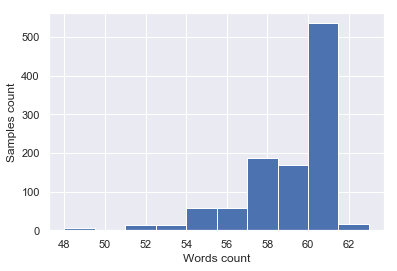

1055

In [91]:
# content length histogram
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

def count_words(text):
    return len(text.split(' '))

lengths = list(map(count_words, df.content.tolist()))
plt.hist(lengths)
plt.xlabel('Words count')
plt.ylabel('Samples count')
plt.show()

len(lengths)

In [92]:
# example text processed
from app.main.predicting.text_processing import TextProcessingContainer

text_processor = TextProcessingContainer.instance

text_processor.preprocess_text(
    'There’s been a lot written about the theory behind TF-IDF but the gist is: '
    'calculate the term frequency (TF), or number of times a word appears across '
    'the text you’re interested in analysing. This is intuitive '
    '— more important words appear more often right?')

'lot written theory behind tfidf gist calculate term frequency tf number time word appears across text youre interested analysing intuitive important word appear often right'

In [93]:
df.content = df.content.map(lambda x: text_processor.preprocess_text(x))

In [94]:
from collections import Counter

def have_was_filter(word):
    if word == 'ha':
        return 'have'
    elif word == 'wa':
        return 'was'
    else:
        return word

def popular_words(label, n_most_popular):
    articles = df[df.label == label].content.tolist()
    counted = Counter([word for article in articles for word in article.split(' ')])
    sorted_words = sorted(counted.items(), key=lambda kv: kv[1], reverse=True)
    return sorted_words[:n_most_popular]

def popular_words_hist(label, n_most_popular):
    lst = popular_words(label, n_most_popular)
    words = list(map(lambda x: have_was_filter(x[0]), lst))
    counts = list(map(lambda x: x[1], lst))
    plt.barh(words, counts)
    plt.xlabel('Count')
    plt.ylabel('Word')
    plt.title('{} most popular words in {} articles'.format(n_most_popular, label))
    plt.show()

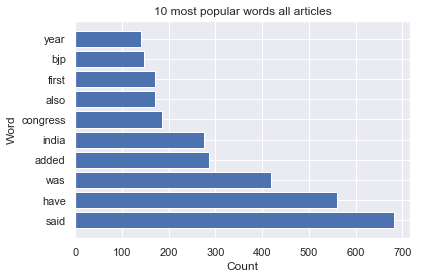

In [95]:
articles = df.content.tolist()
counted = Counter([word for article in articles for word in article.split(' ')])
sorted_words = sorted(counted.items(), key=lambda kv: kv[1], reverse=True)
lst = sorted_words[:10]
words = list(map(lambda x: have_was_filter(x[0]), lst))
counts = list(map(lambda x: x[1], lst))
plt.barh(words, counts)
plt.xlabel('Count')
plt.ylabel('Word')
plt.title('10 most popular words all articles')
plt.show()

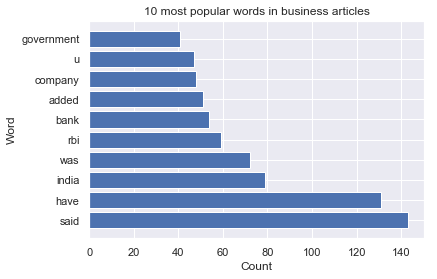

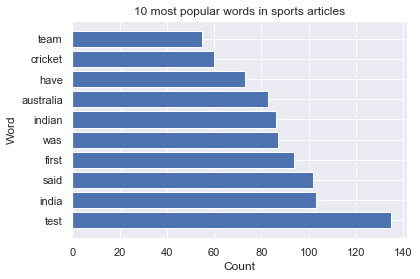

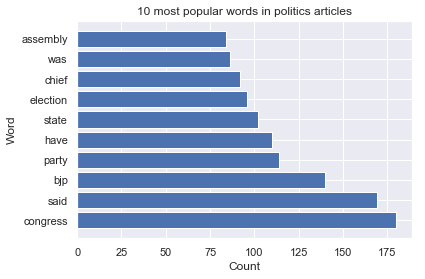

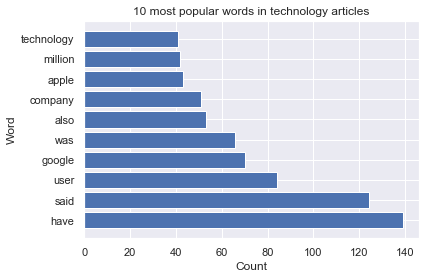

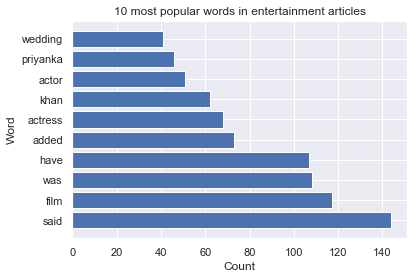

In [96]:
suggested_categories = ['business', 'sports', 'politics', 'technology', 'entertainment']

for cat in suggested_categories:
    popular_words_hist(cat, 10)

In [97]:
from nltk import ngrams

def popular_ngrams(label, n, n_most_popular):
    articles = df[df.label == label].content.tolist()
    counted = Counter([word for article in articles for word in ngrams(list(map(have_was_filter, article.split(' '))), n)])
    sorted_words = sorted(counted.items(), key=lambda kv: kv[1], reverse=True)
    return sorted_words[:n_most_popular]

def popular_ngrams_hist(label, n, n_most_popular):
    lst = popular_ngrams(label, n, n_most_popular)
    words = list(map(lambda x: ' '.join(x[0]), lst))
    counts = list(map(lambda x: x[1], lst))
    plt.barh(words, counts)
    plt.xlabel('Count')
    plt.ylabel('Word')
    plt.title('{} most popular words in {} articles'.format(n_most_popular, label))
    plt.show()

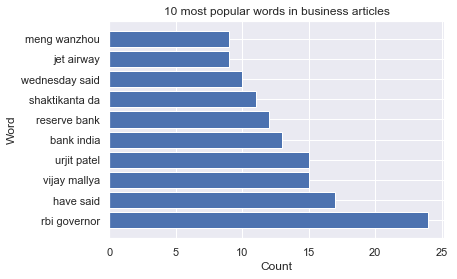

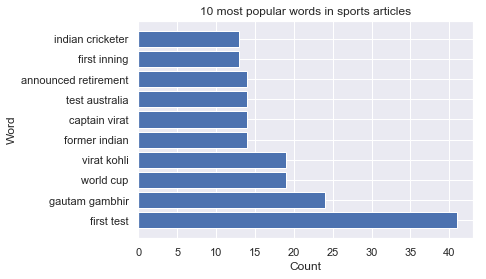

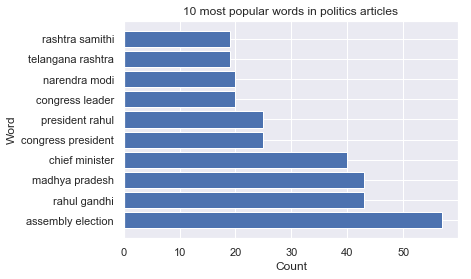

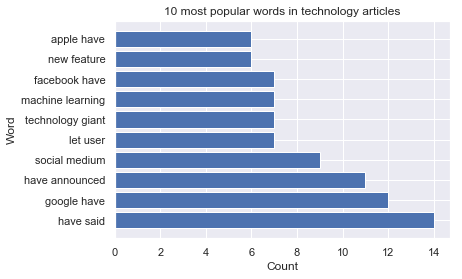

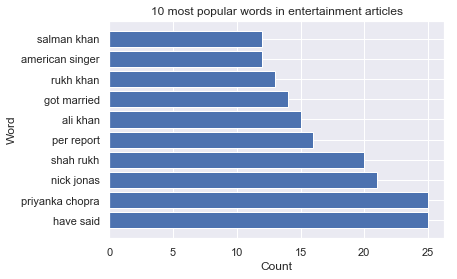

In [98]:
for cat in suggested_categories:
    popular_ngrams_hist(cat, 2, 10)

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

names = ["Nearest Neighbors", 
         "Linear SVM", 
         "RBF SVM", 
         "Gaussian Process",
         "Decision Tree", 
         "Random Forest", 
         "Neural Net", 
         "AdaBoost",
         "Gaussian Naive Bayes",
         "Multinomial Naive Bayes",
         "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    MultinomialNB(),
    QuadraticDiscriminantAnalysis()]

In [100]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X = count_vect.fit_transform(df.content.tolist())
y = df.label.tolist()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

classifiers_results = []

for (name, clf) in zip(names, classifiers):
    clf.fit(X_train.toarray(), y_train)
    score = clf.score(X_test.toarray(), y_test)
    classifiers_results.append((name, score))
    print(name + ": {0:.0%}".format(score))

Nearest Neighbors: 75%
Linear SVM: 87%
RBF SVM: 16%


In [ ]:
classifiers = list(map(lambda x: x[0], classifiers_results))
score = list(map(lambda x: x[1], classifiers_results))
plt.barh(classifiers, score)
plt.xlabel('Score')
plt.ylabel('Classifier')
plt.title('Classifiers scoring')
plt.show()